![Right_Candidate](http://www.prevuehr.com/drive/uploads/2016/11/AdobeStock_95250209-Converted-1024x695.png?_t=1484780827)

In this Notebook, I will try to do detailed Exploratory data analysis(EDA) on Student Placement Dataset with Visualization. Extract different Insights from data that will be helpful for Fresh candidates. At the end I will Create Machine Learning Model that predicts whether a particular candidate got placement or not based on some feature.

**I Hope you will like my work!**

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:170%;text-align:center;border-radius:20px 80px;">📋 TABLE OF CONTENTS</p>   

    
* [1. Importing Libraries](#1)
    
* [2. Meta information of dataframe](#2)
    
* [3. Statistical information](#3)  
    
* [4. NaN values](#4)  
    
* [5. EDA & Visualization](#5)
    * [5.1. Mean Age of Students](#5.1)
    
    * [5.2. Total Male & Female](#5.2)
    
    * [5.3. Total Male & Female Pass Placement Exam](#5.3)
    
    * [5.4. Higher CGPA VS Placement](#5.4)
    
    * [5.5. Lower CGPA VS Placement](#5.5)
    
    * [5.6. Analyze Stream](#5.6)
    
    * [5.7. No Internship Experience VS Placement](#5.7)
    
    * [5.8. Top words in Stream](#5.8)

* [6. Preprocess data for Machine Learning](#6)
    * [6.1. One-Hot Encoding](#6.1)
    
    * [6.2. Scaling Features](#6.2)

* [7. Visualize Coorelation](#7)
 
* [8. Train Test Split](#8)

* [9. Create & Train Model](#9)

* [10. Visualize Model Score](#10)

* [11. Hyperparameter tuning using RandomizedSearchCV](#11)

* [12. Best estimator and best hyperparameters](#12)

* [13. Training model with best hyperparameters](#13)

* [14. Plot Confusion Matrix](#14)









    

<a id="1"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📥 Importing libraries</p>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", category = FutureWarning)


sns.set(style="darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-placements-prediction/collegePlace.csv


In [2]:
data = pd.read_csv('/kaggle/input/engineering-placements-prediction/collegePlace.csv')

data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


<a id="2"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📝 Meta information of Dataframe</p>


In [3]:
print(f"Shape of Dataframe is: {data.shape}")

Shape of Dataframe is: (2966, 8)


In [4]:
print('Datatype in Each Column\n')
pd.DataFrame(data.dtypes, columns=['Datatype']).rename_axis("Column Name")

Datatype in Each Column



,Datatype
Column Name,
Age,int64
Gender,object
Stream,object
Internships,int64
CGPA,int64
Hostel,int64
HistoryOfBacklogs,int64
PlacedOrNot,int64


<a id="3"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📈 Statistical information of Dataframe</p>


In [5]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,2966.000000,21.485840,1.324933,19.000000,21.000000,21.000000,22.000000,30.000000
Internships,2966.000000,0.703641,0.740197,0.000000,0.000000,1.000000,1.000000,3.000000
CGPA,2966.000000,7.073837,0.967748,5.000000,6.000000,7.000000,8.000000,9.000000
Hostel,2966.000000,0.269049,0.443540,0.000000,0.000000,0.000000,1.000000,1.000000
HistoryOfBacklogs,2966.000000,0.192178,0.394079,0.000000,0.000000,0.000000,0.000000,1.000000
PlacedOrNot,2966.000000,0.552596,0.497310,0.000000,0.000000,1.000000,1.000000,1.000000



<a id="4"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🔎 Checking for NaN values</p>


In [6]:
pd.DataFrame(data.isnull().sum(), columns=["Null Values"]).rename_axis("Column Name")

,Null Values
Column Name,
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


### **Fortunately data has no missing value**

<a id="5"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🔥 EDA & Visualization</p>


<a id="5.1"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Mean Age of Student</p>


In [7]:
fig = px.histogram(data, 'Age',
                   title="<b>Average Age of Student</b>")

fig.add_vline(x=data['Age'].mean(), line_width=2, line_dash="dash", line_color="red")

fig.show()

In [8]:
fig = px.histogram(data, 'Age',             
                   color = "Gender",
                   marginal = 'violin',
                   title = "<b>Average Age Gender wise</b>")

fig.update_traces(marker = {"opacity": 0.7})

fig.add_vline(x = data['Age'].mean(),
              line_width = 2,
              line_dash = "dash",
              line_color = "black")

fig.show()

<a id="5.2"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Total Male & Female</p>


In [9]:
pd.DataFrame(data['Gender'].value_counts()).rename({"Gender":"Counts"}, axis = 1).rename_axis("Gender")

,Counts
Gender,
Male,2475
Female,491


In [10]:
px.histogram(data, x = "Gender", title = "<b>Total Male and Female</b>", color = "Gender")

In [11]:
fig = px.pie(data, names = "Gender",
             title = "<b>Counts in Gender</b>",
             hole = 0.5, template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))


fig.show()


<a id="5.3"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Total Male and Female Pass Placement</p>




In [12]:
male = data[data['Gender'] == "Male"]
female = data[data['Gender'] == "Female"]

In [13]:
total_male = male.shape[0]
total_female = female.shape[0]

In [14]:
total_male_pass = male[male['PlacedOrNot'] == 1].shape[0]
total_female_pass = female[female['PlacedOrNot'] == 1].shape[0]

In [15]:
pass_male_percentage = np.round((total_male_pass * 100) / total_male,2)
pass_female_percentage = np.round((total_female_pass * 100) / total_female,2)

In [16]:
details = {"Total Male": [total_male],
             "Total Female": [total_female],
             "Total male pass" : [total_male_pass],
             "Total female pass" : [total_female_pass],
             "% of Passed Male" : [pass_male_percentage],
             "% of Passed Female" : [pass_female_percentage]}

In [17]:
details

{'Total Male': [2475],
 'Total Female': [491],
 'Total male pass': [1364],
 'Total female pass': [275],
 '% of Passed Male': [55.11],
 '% of Passed Female': [56.01]}

In [18]:
gender_wise = pd.DataFrame(details, index=["Detail"])
gender_wise.T

,Detail
Total Male,2475.00
Total Female,491.00
Total male pass,1364.00
Total female pass,275.00
% of Passed Male,55.11
% of Passed Female,56.01


In [19]:
fig = px.histogram(data_frame = data,
             x = "Stream",
             color="PlacedOrNot", title="<b>Counts of Stream</b>",
             pattern_shape_sequence=['x'],
             template='plotly_dark')

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

**Majority of candidate are Computer Science Student and they are also large in number who got placement as compare to other Streams**

<a id="5.4"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Higher CGPA Vs Placement</p>




## **Displaying all those records whose CGPA is above average**

In [20]:
cgpa_above_avg = data[data['CGPA'] > data['CGPA'].mean()]

cgpa_above_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
11,22,Female,Electrical,1,8,0,1,1
13,21,Male,Computer Science,1,8,0,1,1
...,...,...,...,...,...,...,...,...
2951,21,Male,Computer Science,3,8,0,0,1
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2956,22,Male,Computer Science,0,8,0,0,1


In [21]:
fig = px.histogram(data_frame = cgpa_above_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Above Average CGPA Vs Placement</b>",
                   template='plotly')

fig.update_layout(bargap=0.2)

fig.show()

**Above graph represents that all those students whose CGPA is above average has successfully pass placement test, So we can say that if a person has higher CGPA it will increase his/her chance of placement.**


<a id="5.5"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Lower CGPA Vs Placement</p>




## **Candidates whose CGPA is below average**

In [22]:
cgpa_below_avg = data[data['CGPA'] < data['CGPA'].mean()]

cgpa_below_avg

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
7,21,Male,Information Technology,1,7,0,0,0
...,...,...,...,...,...,...,...,...
2960,23,Male,Mechanical,1,7,1,0,0
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0


In [23]:
fig = px.histogram(data_frame = cgpa_below_avg,
                   x = 'CGPA',
                   color='PlacedOrNot',
                   title = "<b>Below Average CGPA Vs Placement</b>",
                   template='plotly_dark', barmode='group')

fig.update_layout(bargap=0.2)

fig.show()

**From above above, if some student has CGPA below average it will reduce his/her chances of placement**


<a id="5.6"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Analyze important features stream wise</p>




In [24]:
stream_wise = data.groupby('Stream').agg({'Age':'mean',
                                          'Internships' : 'sum',                            
                                           "CGPA":'mean',
                                           'PlacedOrNot':'sum'})

stream_wise.style.highlight_max()

,Age,Internships,CGPA,PlacedOrNot
Stream,,,,
Civil,21.441640,173,7.094637,146
Computer Science,21.559278,676,7.039948,452
Electrical,21.299401,203,7.080838,181
Electronics And Communication,21.410377,306,7.125000,251
Information Technology,21.539797,509,7.073806,409
Mechanical,21.518868,220,7.063679,200


In [25]:
px.bar(data_frame=stream_wise, barmode='group',
       title = "<b>Stream wise Analyzing</b>",template="plotly_dark")

**From Computer Science degree most of the student placed...**

<a id="5.7"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Effect of No Internship Experience on Placement</p>




In [26]:
no_internship = data[data['Internships'] == 0]

no_internship

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
1,21,Female,Computer Science,0,7,1,1,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
5,22,Male,Electronics And Communication,0,6,0,0,0
6,21,Male,Computer Science,0,7,0,1,0
...,...,...,...,...,...,...,...,...
2956,22,Male,Computer Science,0,8,0,0,1
2958,23,Male,Computer Science,0,6,0,1,0
2959,23,Male,Information Technology,0,7,0,0,0
2961,23,Male,Information Technology,0,7,0,0,0


In [27]:
fig = px.histogram(data_frame = no_internship,
                   x = "PlacedOrNot",
                   color="PlacedOrNot",
                   title = "<b>No Internship Experience Vs Placement</b>",
                   template = 'plotly_dark')

fig.update_layout(bargap = 0.2)

fig.show()

In [28]:
fig = px.pie(no_internship, names = "PlacedOrNot",
             hole = 0.5)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))


fig.show()

**So from above graph, if person don't have any Internship Experience, it will not much effect on his/her placement. Majority of the student who don't have any Internship Experience has passed the placement exam**

<a id="5.8"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Top words in Stream</p>




In [29]:
def plot_word_cloud(df, col_name):    
    text = ' '.join(df[col_name].str.lower())

    wordcloud = WordCloud(width = 2000, height = 900,
                          background_color ='black',
                          collocations=False,
                          max_words=500,
                          min_font_size = 15).generate(text)

    plt.figure(figsize=(12, 8), facecolor = 'k', edgecolor = 'k' )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.show()

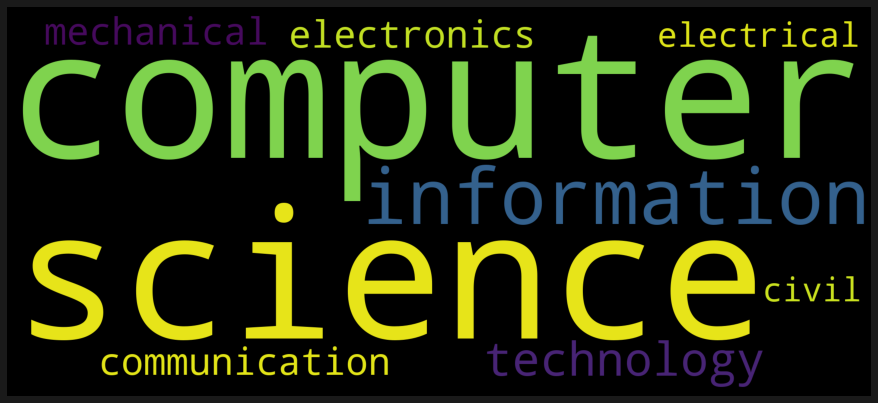

In [30]:
plot_word_cloud(data, "Stream")

<a id="6"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">⚙️ Preprocessing data for Machine Learning</p>




<a id="6.1"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ One-Hot Encoding</p>




In [31]:
dummy_gender = pd.get_dummies(data['Gender'])
dummy_stream = pd.get_dummies(data['Stream'])

In [32]:
data = pd.concat([data.drop(["Gender", "Stream"], axis = 1), dummy_gender, dummy_stream], axis = 1)

data

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Female,Male,Civil,Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,0,7,0,0,0,0,1,0,0,0,0,1,0
2962,23,1,7,1,0,0,0,1,0,0,0,0,0,1
2963,22,1,7,0,0,0,0,1,0,0,0,0,1,0
2964,22,1,7,0,0,0,0,1,0,1,0,0,0,0


## **Rearrange columns**

In [33]:
data = data[['Age', 'Male', 'Female',
             'Electronics And Communication',
             'Computer Science', 'Information Technology',
             'Mechanical', 'Electrical', "Civil",
             "Internships","CGPA",'Hostel',
             'HistoryOfBacklogs', 'PlacedOrNot']]

data

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,0,0,0,0,0,1,8,1,1,1
1,21,0,1,0,1,0,0,0,0,0,7,1,1,1
2,22,0,1,0,0,1,0,0,0,1,6,0,0,1
3,21,1,0,0,0,1,0,0,0,0,8,0,1,1
4,22,1,0,0,0,0,1,0,0,0,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,1,0,0,0,1,0,0,0,0,7,0,0,0
2962,23,1,0,0,0,0,1,0,0,1,7,1,0,0
2963,22,1,0,0,0,1,0,0,0,1,7,0,0,0
2964,22,1,0,0,1,0,0,0,0,1,7,0,0,0


<a id="6.2"></a>
# <p style="background-color:#73d1ff;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✔️ Scaling features</p>




In [34]:
scaler = StandardScaler()

scaler.fit(data.drop('PlacedOrNot',axis=1))

scaled_features = scaler.transform(data.drop('PlacedOrNot',axis=1))

In [35]:
scaled_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
scaled_features.head()

,Age,Male,Female,Electronics And Communication,Computer Science,Information Technology,Mechanical,Electrical,Civil,Internships,CGPA,Hostel,HistoryOfBacklogs
0,0.388131,0.445403,-0.445403,2.448527,-0.595263,-0.551123,-0.408409,-0.35623,-0.34593,0.400445,0.957191,1.648269,2.050246
1,-0.366752,-2.245158,2.245158,-0.408409,1.679930,-0.551123,-0.408409,-0.35623,-0.34593,-0.950773,-0.076310,1.648269,2.050246
2,0.388131,-2.245158,2.245158,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,0.400445,-1.109812,-0.606697,-0.487746
3,-0.366752,0.445403,-0.445403,-0.408409,-0.595263,1.814478,-0.408409,-0.35623,-0.34593,-0.950773,0.957191,-0.606697,2.050246
4,0.388131,0.445403,-0.445403,-0.408409,-0.595263,-0.551123,2.448527,-0.35623,-0.34593,-0.950773,0.957191,1.648269,-0.487746



<a id="7"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🎰 Visualize coorelation of independent feature with dependent</p>




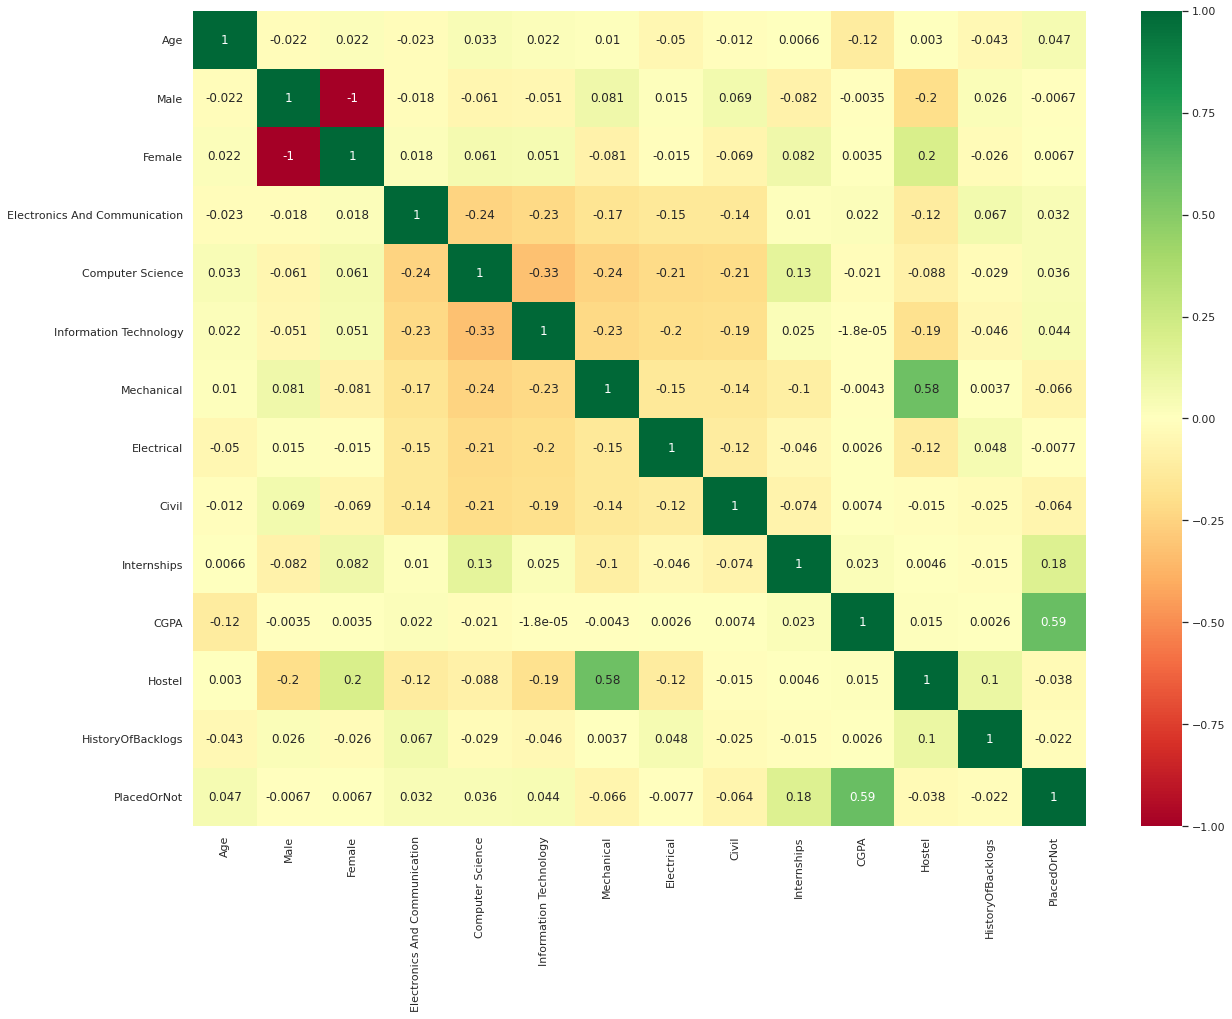

In [36]:
corrmat = data.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,15))

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Internship and CGPA is highly coorelated with dependent feature i.e PlacedOrNot**




<a id="8"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🧾 Train test split</p>




In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    data['PlacedOrNot'],
                                                    test_size = 0.25,
                                                    random_state = 0)


In [38]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}\n")

print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_test is: {y_test.shape}")

Shape of X_train is: (2224, 13)
Shape of X_test is: (742, 13)

Shape of y_train is: (2224,)
Shape of y_test is: (742,)



<a id="9"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🤖 Create & Train Model</p>




In [39]:
def models_score(models, X_train, X_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
        
    return model_scores

In [40]:
models = {"DecisionTree":DecisionTreeClassifier(),
         "RandomForest":RandomForestClassifier(),
         "XgBoost": XGBClassifier(),
         "KNeighborsClassifier":KNeighborsClassifier()}


<a id="10"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📊 Visualize Model Score</p>




In [41]:
model_scores = models_score(models, X_train, X_test, y_train, y_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[17:07:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [42]:
model_scores.style.highlight_max()

,Score
KNeighborsClassifier,0.851752
RandomForest,0.871968
DecisionTree,0.876011
XgBoost,0.876011


In [43]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

In [44]:
model_scores.style.bar(color = '#47b7ed')

,Algorithms,Score
0,KNeighborsClassifier,0.851752
1,RandomForest,0.871968
2,DecisionTree,0.876011
3,XgBoost,0.876011


In [45]:
fig = px.bar(data_frame = model_scores,
             x = "Algorithms",
             y = "Score",
             color = "Algorithms",
             title = "<b>Models Score</b>",
             template = 'plotly_dark')


fig.update_layout(bargap = 0.2,
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [46]:
label = model_scores['Algorithms']
value = model_scores['Score']

fig = go.Figure(data = [go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color='#000000', width = 1.5)))

fig.update_layout(title = "<b>Models Score</b>",
                  template = 'plotly_dark')

fig.show()

<a id="11"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">📻 Hyperparameter tuning using RandomizedSearchCV</p>





In [47]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print(f'\nTime taken: {thour} hours {tmin} minutes and {round(tsec, 2)} seconds.')

In [49]:
# For now I use xgboost algo
xgb_classifier = XGBClassifier()

In [50]:
random_search = RandomizedSearchCV(xgb_classifier,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   cv=5, verbose=3)

In [51]:
start_time = timer(None) 

random_search.fit(X_train, y_train)

timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[17:12:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Time taken: 0.0 hours 5.0 minutes and 41.33 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.7min finished
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



<a id="12"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">✨ Checking for best Estimator and best Hyperparameters</p>





In [52]:
xgb_best_params = random_search.best_estimator_

In [53]:
xgb_best_params

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 12,
 'learning_rate': 0.25,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [55]:
classifier = xgb_best_params


<a id="13"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">🤓 Training model with Best Hyperparameters</p>





In [56]:
classifier.fit(X_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
pred = classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred)}")

Accuracy: 0.8921832884097035


<a id="14"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:20px 80px;">(⌐■_■) Ploting confusion matrix</p>






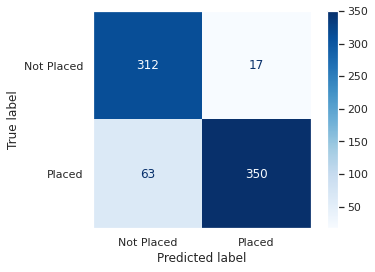

In [58]:
plot_confusion_matrix(classifier,
                      X_test, y_test,
                      cmap = plt.cm.Blues,
                      display_labels = ['Not Placed', 'Placed'])
plt.grid(False)
plt.show();

<a id="6.2"></a>
# <p style="background-color:#47b7ed;font-family:newtimeroman;color:#FFF9ED;font-size:130%;text-align:center;border-radius:10px 10px;">I Hope my Kernel will be helpful for you. If you like my work, Don't forget to Upvote Thank You! 🙂</p>

